# Forecasting Assignment - Coco-Cola Sales Problem
## -------------------------------------------------------------------------------------------------------------------------------

## Problem Statement : Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

## 1. Import neessary libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset :

In [2]:
coco_cola_sales_data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
coco_cola_sales_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


## 3. Data Understanding :

In [3]:
coco_cola_sales_data.shape

(42, 2)

In [4]:
coco_cola_sales_data.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [5]:
coco_cola_sales_data.dtypes

Quarter     object
Sales      float64
dtype: object

## 4. Data Preparation :

In [6]:
#Creating a new column 
coco_cola_sales_data['quarter'] = np.NaN
coco_cola_sales_data['year'] = np.NaN
coco_cola_sales_data.head()

,Quarter,Sales,quarter,year
0,Q1_86,1734.827000,NaN,NaN
1,Q2_86,2244.960999,NaN,NaN
2,Q3_86,2533.804993,NaN,NaN
3,Q4_86,2154.962997,NaN,NaN
4,Q1_87,1547.818996,NaN,NaN


In [7]:
coco_cola_sales_data['quarter'] = coco_cola_sales_data['quarter'].fillna(value=0)
coco_cola_sales_data['year'] = coco_cola_sales_data['year'].fillna(value = 0)
coco_cola_sales_data.head()

,Quarter,Sales,quarter,year
0,Q1_86,1734.827000,0.0,0.0
1,Q2_86,2244.960999,0.0,0.0
2,Q3_86,2533.804993,0.0,0.0
3,Q4_86,2154.962997,0.0,0.0
4,Q1_87,1547.818996,0.0,0.0


In [8]:
#Declaring a list 
quarter = ['Q1','Q2','Q3','Q4']
quarter

['Q1', 'Q2', 'Q3', 'Q4']

In [9]:
year = ['86','87','88','89','90','91','92','93','94','95','96']
year

['86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96']

In [10]:
#Assigning the value of QUarter to a variable
var_1 = coco_cola_sales_data['Quarter'][0]
var_1

'Q1_86'

In [11]:
#Simplifying the value of Variable to obtain quarter
var_1[0:2]

'Q1'

In [12]:
var_1[3:5]

'86'

In [13]:
for i in range(0,42):
    var = coco_cola_sales_data['Quarter'][i]
    coco_cola_sales_data['quarter'][i] = var[0:2]
    coco_cola_sales_data['year'][i] = (var[3:5])

coco_cola_sales_data

,Quarter,Sales,quarter,year
0,Q1_86,1734.827000,Q1,86.0
1,Q2_86,2244.960999,Q2,86.0
2,Q3_86,2533.804993,Q3,86.0
3,Q4_86,2154.962997,Q4,86.0
4,Q1_87,1547.818996,Q1,87.0
5,Q2_87,2104.411995,Q2,87.0
6,Q3_87,2014.362999,Q3,87.0
7,Q4_87,1991.746998,Q4,87.0
8,Q1_88,1869.049999,Q1,88.0
9,Q2_88,2313.631996,Q2,88.0


In [14]:
coco_cola_sales_data.dtypes

Quarter     object
Sales      float64
quarter     object
year       float64
dtype: object

In [15]:
#converting the year data type
coco_cola_sales_data['year'] = coco_cola_sales_data['year'].astype(int)
coco_cola_sales_data.dtypes

Quarter     object
Sales      float64
quarter     object
year         int32
dtype: object

In [16]:
coco_cola_sales_data['year'] = coco_cola_sales_data['year']+1900
coco_cola_sales_data.head()

,Quarter,Sales,quarter,year
0,Q1_86,1734.827000,Q1,1986
1,Q2_86,2244.960999,Q2,1986
2,Q3_86,2533.804993,Q3,1986
3,Q4_86,2154.962997,Q4,1986
4,Q1_87,1547.818996,Q1,1987


In [17]:
coco_cola_sales_data_copy = coco_cola_sales_data.copy()
coco_cola_sales_data_copy.head()

,Quarter,Sales,quarter,year
0,Q1_86,1734.827000,Q1,1986
1,Q2_86,2244.960999,Q2,1986
2,Q3_86,2533.804993,Q3,1986
3,Q4_86,2154.962997,Q4,1986
4,Q1_87,1547.818996,Q1,1987


In [18]:
coco_cola_sales_pivot_data = pd.pivot_table(data= coco_cola_sales_data,values='Sales',index='year',columns='quarter',fill_value=0)
coco_cola_sales_pivot_data

quarter,Q1,Q2,Q3,Q4
year,,,,
1986,1734.827000,2244.960999,2533.804993,2154.962997
1987,1547.818996,2104.411995,2014.362999,1991.746998
1988,1869.049999,2313.631996,2128.320000,2026.828999
1989,1910.603996,2331.164993,2206.549995,2173.967995
1990,2148.278000,2739.307999,2792.753998,2556.009995
1991,2480.973999,3039.522995,3172.115997,2879.000999
1992,2772.000000,3550.000000,3508.000000,3243.859993
1993,3056.000000,3899.000000,3629.000000,3373.000000
1994,3352.000000,4342.000000,4461.000000,4017.000000


## 5. Visualization :

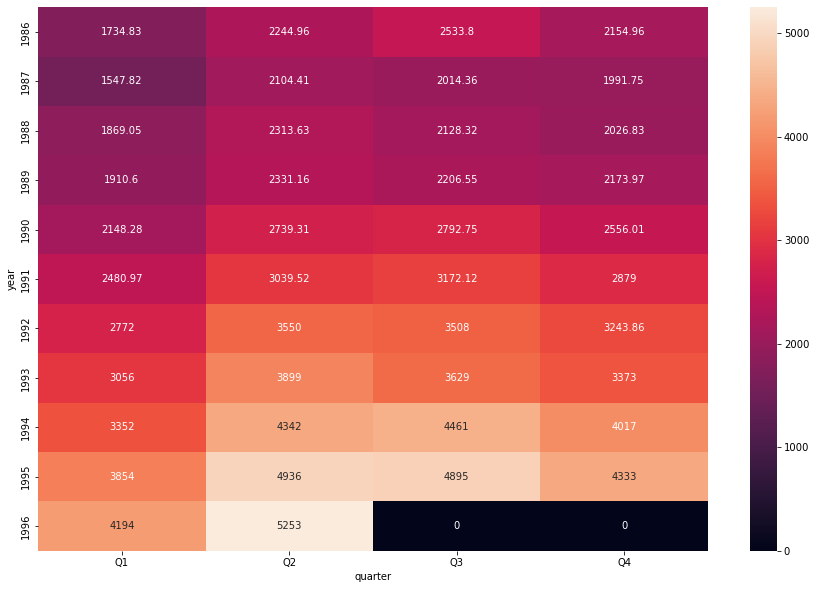

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(data = coco_cola_sales_pivot_data,annot=True,fmt='g')
plt.show()

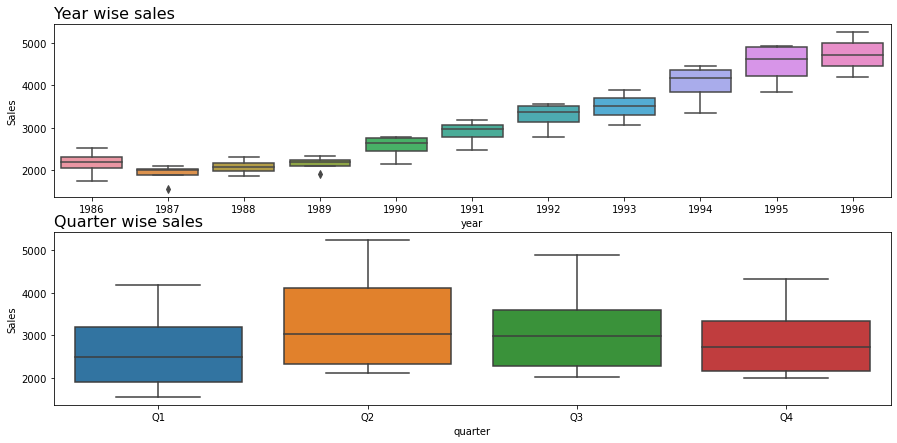

In [20]:
#Boxplot for the data
plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.boxplot(x='year',y='Sales',data=coco_cola_sales_data)
plt.title('Year wise sales',loc='left',fontsize = 16)
plt.subplot(212)
sns.boxplot(x='quarter',y='Sales',data = coco_cola_sales_data)
plt.title('Quarter wise sales',loc='left',fontsize = 16)
plt.show()

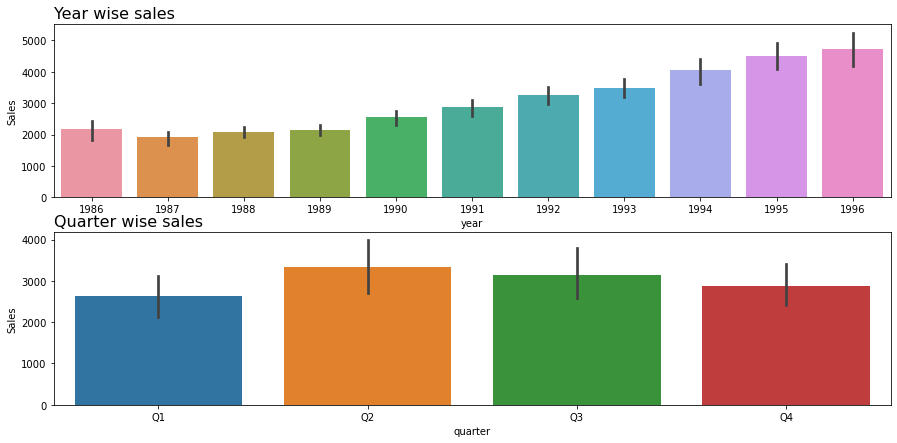

In [21]:
#Barplot for the data
plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.barplot(x='year',y='Sales',data=coco_cola_sales_data)
plt.title('Year wise sales',loc='left',fontsize = 16)
plt.subplot(212)
sns.barplot(x='quarter',y='Sales',data = coco_cola_sales_data)
plt.title('Quarter wise sales',loc='left',fontsize = 16)
plt.show()

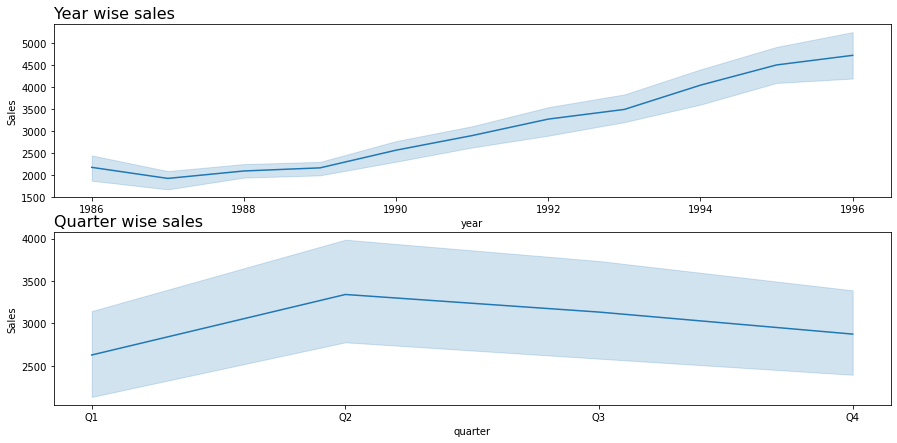

In [22]:
#Lineplot for the data
plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.lineplot(x='year',y='Sales',data=coco_cola_sales_data)
plt.title('Year wise sales',loc='left',fontsize = 16)
plt.subplot(212)
sns.lineplot(x='quarter',y='Sales',data = coco_cola_sales_data)
plt.title('Quarter wise sales',loc='left',fontsize = 16)
plt.show()

## 6. Creating dummies :

In [23]:
dummy = pd.get_dummies(coco_cola_sales_data['quarter'])
dummy

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [24]:
dummy_df = pd.DataFrame(dummy)
dummy_df

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


### Merging of dummy data set with the sales data :

In [25]:
coco_cola_sales_data_copy = pd.concat((coco_cola_sales_data_copy,dummy_df),axis=1)
coco_cola_sales_data_copy

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1986,1,0,0,0
1,Q2_86,2244.960999,Q2,1986,0,1,0,0
2,Q3_86,2533.804993,Q3,1986,0,0,1,0
3,Q4_86,2154.962997,Q4,1986,0,0,0,1
4,Q1_87,1547.818996,Q1,1987,1,0,0,0
5,Q2_87,2104.411995,Q2,1987,0,1,0,0
6,Q3_87,2014.362999,Q3,1987,0,0,1,0
7,Q4_87,1991.746998,Q4,1987,0,0,0,1
8,Q1_88,1869.049999,Q1,1988,1,0,0,0
9,Q2_88,2313.631996,Q2,1988,0,1,0,0


In [26]:
coco_cola_sales_data_copy['t'] = np.arange(1,43)
coco_cola_sales_data_copy['t_squared'] = coco_cola_sales_data_copy['t'] * coco_cola_sales_data_copy['t']
coco_cola_sales_data_copy['log_sales'] = np.log(coco_cola_sales_data_copy['Sales'])
coco_cola_sales_data_copy

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,1986,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,1986,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,1986,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,1986,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1987,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,1987,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,1987,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,1987,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1988,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,1988,0,1,0,0,10,100,7.746574


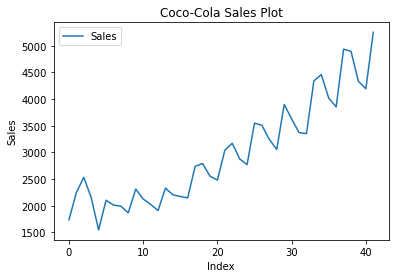

In [27]:
coco_cola_sales_data_copy['Sales'].plot()
plt.title('Coco-Cola Sales Plot')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 7. Splitting the data :

In [28]:
train_data = coco_cola_sales_data_copy.head(30)
test_data = coco_cola_sales_data_copy.tail(12)

In [29]:
train_data

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,1986,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,1986,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,1986,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,1986,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1987,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,1987,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,1987,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,1987,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1988,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,1988,0,1,0,0,10,100,7.746574


In [30]:
test_data

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
30,Q3_93,3629.0,Q3,1993,0,0,1,0,31,961,8.196712
31,Q4_93,3373.0,Q4,1993,0,0,0,1,32,1024,8.123558
32,Q1_94,3352.0,Q1,1994,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,1994,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,1994,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,1994,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1995,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,1995,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,1995,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,1995,0,0,0,1,40,1600,8.374015


## 8. Model Based Forecasting :

In [31]:
import statsmodels.formula.api as smf

### 8.1 Linear Model :

In [32]:
#training
linear_model = smf.ols('Sales~t',data= train_data).fit()

#testing
pred_linear = pd.Series(linear_model.predict(test_data['t']))

#evaluation
rmse_linear = np.sqrt((np.mean(np.array(test_data['Sales'])-np.array(pred_linear))**2))
rmse_linear

545.5139554447723

### 8.2 Exponential Model :

In [33]:
#training
exponential_model = smf.ols('log_sales~t',data= train_data).fit()

#testing
pred_exponential = pd.Series(exponential_model.predict(test_data['t']))

#evaluation
rmse_exponential = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_exponential)))**2))
rmse_exponential

552.2821039079249

### 8.3 Quadratic Model :

In [34]:
#training
quadratic_model = smf.ols('Sales~t+t_squared',data= train_data).fit()

#testing
pred_quadratic = pd.Series(quadratic_model.predict(test_data[["t","t_squared"]]))

#evaluation
rmse_quadratic = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_quadratic))**2))
rmse_quadratic

646.2715428311276

### 8.4 Additive Seasonality Model :

In [35]:
#training
additive_seasonality_model = smf.ols('Sales~Q1+Q2+Q3+Q4',data= train_data).fit()

#testing
pred_additive_seasonality= pd.Series(additive_seasonality_model.predict(test_data[['Q1','Q2','Q3','Q4']]))

#evaluation
rmse_additive_seasonality = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_additive_seasonality))**2))
rmse_additive_seasonality

1778.0065467941365

### 8.5 Additive Seasonality With Quadratic Trend Model :

In [36]:
#training
additive_seasonality_quadratic_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data= train_data).fit()

#testing
pred_additive_seasonality_quadratic= pd.Series(additive_seasonality_quadratic_model.predict(test_data[['t','t_squared','Q1','Q2','Q3','Q4']]))

#evaluation
rmse_additive_seasonality_quadratic = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_additive_seasonality_quadratic))**2))
rmse_additive_seasonality_quadratic

586.0533067870614

### 8.6 Multipicative Seasonality Model :

In [37]:
#training
multipicative_seasonality_model = smf.ols('log_sales~Q1+Q2+Q3+Q4',data= train_data).fit()

#testing
pred_multipicative_seasonality= pd.Series(multipicative_seasonality_model.predict(test_data[['Q1','Q2','Q3','Q4']]))

#evaluation
rmse_multipicative_seasonality = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_multipicative_seasonality)))**2))
rmse_multipicative_seasonality

1828.9238912138114

###  Results of Models :

In [38]:
#Compare the results
data ={'MODEL':pd.Series(["LINEAR_MODEL","EXPONENTIAL_MODEL","QUADRATIC_MODEL","ADDITIVE_SEASONALITY_MODEL","ADDITIVE_SEASONALITY_WITH_QUADRATIC_TREND_MODEL","MULTIPICATIVE_SEASONALITY_MODEL"]),
      'RMSE_VALUES':pd.Series([rmse_linear,rmse_exponential,rmse_quadratic,rmse_additive_seasonality,rmse_additive_seasonality_quadratic,rmse_multipicative_seasonality])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_VALUES
0,LINEAR_MODEL,545.513955
1,EXPONENTIAL_MODEL,552.282104
2,QUADRATIC_MODEL,646.271543
3,ADDITIVE_SEASONALITY_MODEL,1778.006547
4,ADDITIVE_SEASONALITY_WITH_QUADRATIC_TREND_MODEL,586.053307
5,MULTIPICATIVE_SEASONALITY_MODEL,1828.923891


### Best Model is the Linear Model.

## 9. Final Model Prediction :

### A new predicted data set is created using excel for the next upcoming 3 years (i.e Q3 of 1996 to Q4 of 1999)

In [39]:
predict_data = pd.read_csv('Cocacola_predict.csv',sep=',')
predict_data

,Quarter,Q1,Q2,Q3,Q4,t,t_squared
0,Q3_96,0,0,1,0,43,1849
1,Q4_96,0,0,0,1,44,1936
2,Q1_97,1,0,0,0,45,2025
3,Q2_97,0,1,0,0,46,2116
4,Q3_97,0,0,1,0,47,2209
5,Q4_97,0,0,0,1,48,2304
6,Q1_98,1,0,0,0,49,2401
7,Q2_98,0,1,0,0,50,2500
8,Q3_98,0,0,1,0,51,2601
9,Q4_98,0,0,0,1,52,2704


In [40]:
model_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data= coco_cola_sales_data_copy).fit()
model_full

In [41]:
predict_new = pd.Series(model_full.predict(predict_data))
predict_new

0     5319.754557
1     5137.955882
2     5069.668337
3     5866.186600
4     5942.178733
5     5774.444481
6     5720.221359
7     6530.804045
8     6620.860601
9     6467.190772
10    6427.032072
11    7251.679181
12    7355.800160
13    7216.194754
dtype: float64

In [42]:
predict_data['forecasted_Sales'] =pd.Series(predict_new)
predict_data

,Quarter,Q1,Q2,Q3,Q4,t,t_squared,forecasted_Sales
0,Q3_96,0,0,1,0,43,1849,5319.754557
1,Q4_96,0,0,0,1,44,1936,5137.955882
2,Q1_97,1,0,0,0,45,2025,5069.668337
3,Q2_97,0,1,0,0,46,2116,5866.186600
4,Q3_97,0,0,1,0,47,2209,5942.178733
5,Q4_97,0,0,0,1,48,2304,5774.444481
6,Q1_98,1,0,0,0,49,2401,5720.221359
7,Q2_98,0,1,0,0,50,2500,6530.804045
8,Q3_98,0,0,1,0,51,2601,6620.860601
9,Q4_98,0,0,0,1,52,2704,6467.190772


In [43]:
new_data = pd.concat([coco_cola_sales_data,predict_data])
new_data

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,t,t_squared,forecasted_Sales
0,Q1_86,1734.827000,Q1,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q2_86,2244.960999,Q2,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q3_86,2533.804993,Q3,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q4_86,2154.962997,Q4,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q1_87,1547.818996,Q1,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Q2_87,2104.411995,Q2,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Q3_87,2014.362999,Q3,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Q4_87,1991.746998,Q4,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Q1_88,1869.049999,Q1,1988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Q2_88,2313.631996,Q2,1988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

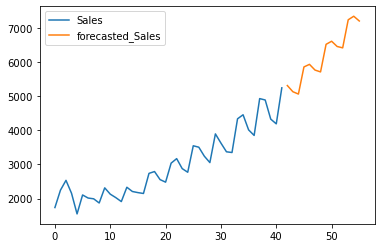

In [44]:
new_data[['Sales','forecasted_Sales']].reset_index(drop=True).plot()

## ----------------------------------------------------------------------------------------------------------------------------

# 10. Data Driven Model :

In [45]:
#Import libraries

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [46]:
coco_cola_sales_data_copy.head()

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,1986,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,1986,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,1986,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,1986,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1987,1,0,0,0,5,25,7.344602


In [47]:
train_data

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,1986,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,1986,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,1986,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,1986,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1987,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,1987,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,1987,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,1987,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1988,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,1988,0,1,0,0,10,100,7.746574


In [48]:
test_data

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
30,Q3_93,3629.0,Q3,1993,0,0,1,0,31,961,8.196712
31,Q4_93,3373.0,Q4,1993,0,0,0,1,32,1024,8.123558
32,Q1_94,3352.0,Q1,1994,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,1994,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,1994,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,1994,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1995,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,1995,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,1995,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,1995,0,0,0,1,40,1600,8.374015


### Visualizations :

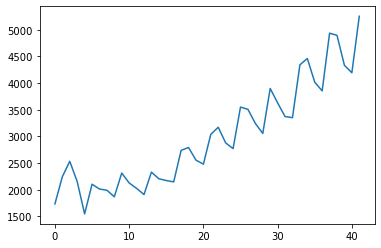

In [49]:
coco_cola_sales_data_copy.Sales.plot()
plt.show()

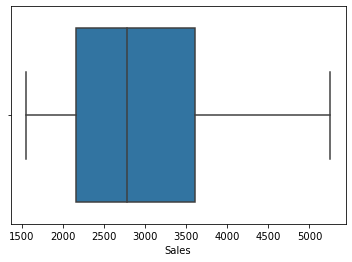

In [50]:
sns.boxplot(coco_cola_sales_data_copy['Sales'])
plt.show()

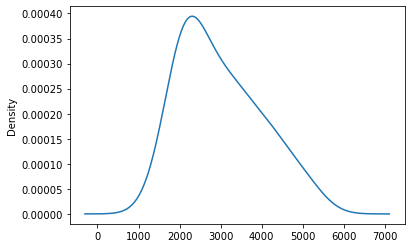

In [51]:
coco_cola_sales_data_copy['Sales'].plot(kind ='kde')
plt.show()

In [52]:
from pandas.plotting import lag_plot

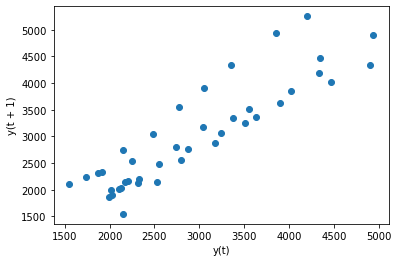

In [53]:
lag_plot(coco_cola_sales_data_copy['Sales'])
plt.show()

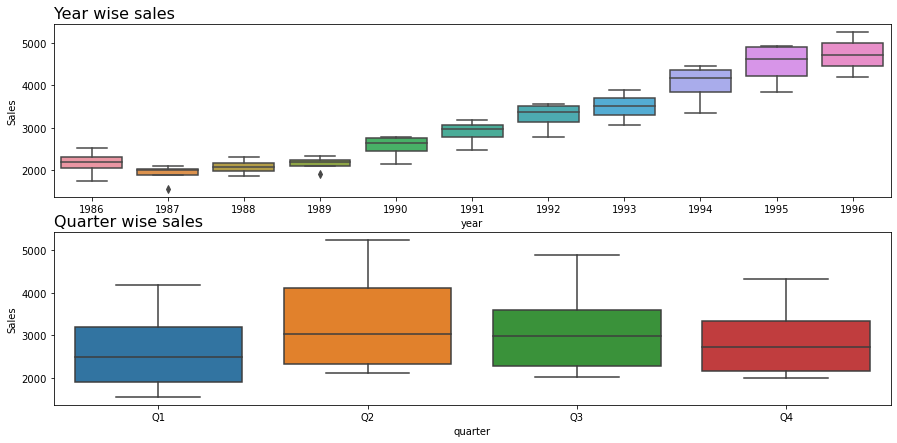

In [54]:
#Boxplot for the data
plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.boxplot(x='year',y='Sales',data=coco_cola_sales_data)
plt.title('Year wise sales',loc='left',fontsize = 16)
plt.subplot(212)
sns.boxplot(x='quarter',y='Sales',data = coco_cola_sales_data)
plt.title('Quarter wise sales',loc='left',fontsize = 16)
plt.show()

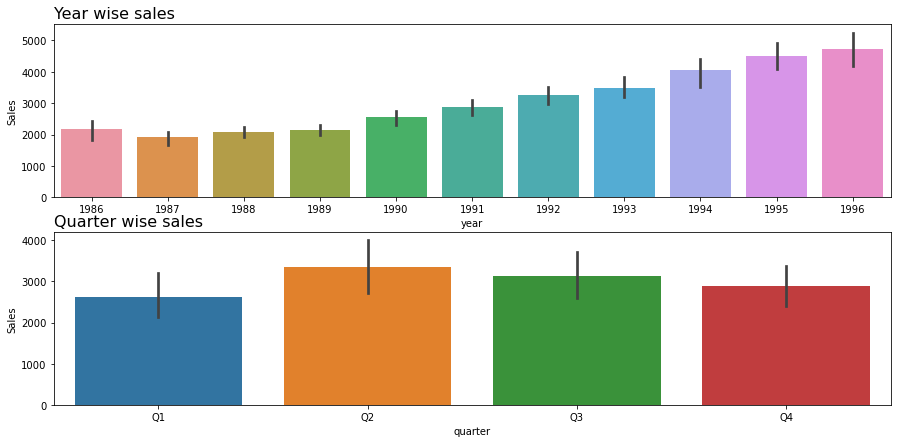

In [55]:
#Barplot for the data
plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.barplot(x='year',y='Sales',data=coco_cola_sales_data)
plt.title('Year wise sales',loc='left',fontsize = 16)
plt.subplot(212)
sns.barplot(x='quarter',y='Sales',data = coco_cola_sales_data)
plt.title('Quarter wise sales',loc='left',fontsize = 16)
plt.show()

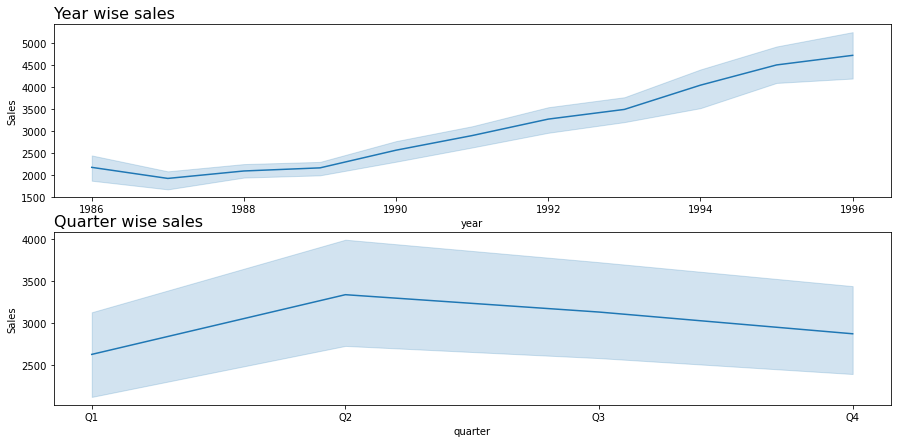

In [56]:
#Lineplot for the data
plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.lineplot(x='year',y='Sales',data=coco_cola_sales_data)
plt.title('Year wise sales',loc='left',fontsize = 16)
plt.subplot(212)
sns.lineplot(x='quarter',y='Sales',data = coco_cola_sales_data)
plt.title('Quarter wise sales',loc='left',fontsize = 16)
plt.show()

### 10.1 Moving Average :

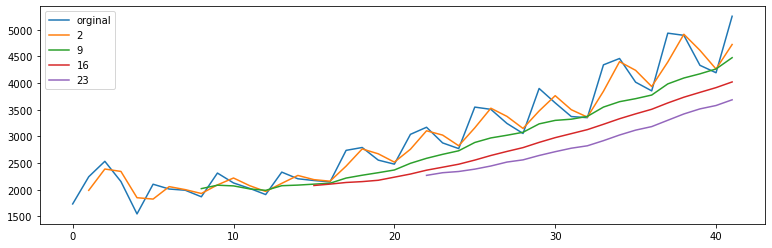

In [57]:
plt.figure(figsize=(13,4))
coco_cola_sales_data_copy.Sales.plot(label="orginal")
for i in range(2,25,7):
    coco_cola_sales_data_copy['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

### 10.2 Time Series Decomposition Plot :

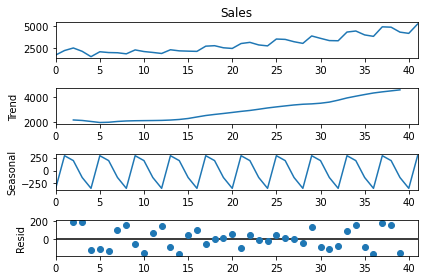

In [58]:
decompose_ts_add = seasonal_decompose(coco_cola_sales_data_copy.Sales,model='additive',period=4,)
decompose_ts_add.plot()
plt.show()

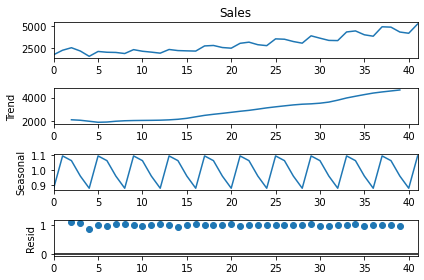

In [59]:
decompose_ts_mul = seasonal_decompose(coco_cola_sales_data_copy.Sales,model='multiplicative',period=4,)
decompose_ts_mul.plot()
plt.show()

### 10.3 ACF and PACF Plots :

In [60]:
import statsmodels.graphics.tsaplots as tsa_plots

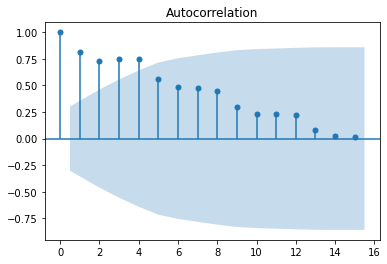

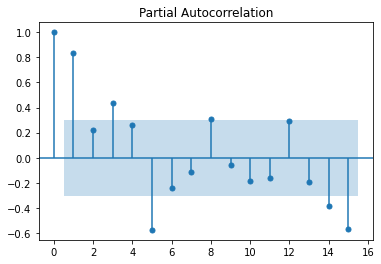

In [61]:
tsa_plots.plot_acf(coco_cola_sales_data_copy.Sales,lags=15)
tsa_plots.plot_pacf(coco_cola_sales_data_copy.Sales,lags=15)
plt.show()

## Evaluating Metric MAPE :

In [62]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### 10.4 Simple Exponential Smoothing Method :

In [63]:
ses_model = SimpleExpSmoothing(train_data["Sales"]).fit(smoothing_level=0.2)
predict_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(predict_ses,test_data.Sales) 

22.046763337847036

### 10.5 Holt Method :

In [64]:
hw_model = Holt(train_data['Sales']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hw,test_data.Sales) 

11.213841942210799

### 10.6 Holts winter exponential smoothing with additive seasonality and additive trend :

In [65]:
hwe_model_add_add = ExponentialSmoothing(train_data['Sales'],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hwe_add_add,test_data.Sales) 

4.8280399061659445

### 10.7 Holts winter exponential smoothing with additive seasonality and multipicative trend :

In [66]:
hwe_model_add_mul = ExponentialSmoothing(train_data['Sales'],seasonal="add",trend="mul",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_mul = hwe_model_add_mul.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hwe_add_mul,test_data.Sales)

3.307491429391073

### 10.8 Holts winter exponential smoothing with multipicative seasonality and additive trend :

In [67]:
hwe_model_mul_add = ExponentialSmoothing(train_data['Sales'],seasonal="mul",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hwe_mul_add,test_data.Sales)

4.338036354578027

### 10.9 Holts winter exponential smoothing with multipicative seasonality and multipicative trend 

In [68]:
hwe_model_mul_mul = ExponentialSmoothing(train_data['Sales'],seasonal="mul",trend="mul",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hwe_mul_mul,test_data.Sales)

2.6754746304818884

### Prediction Model Visualisation:

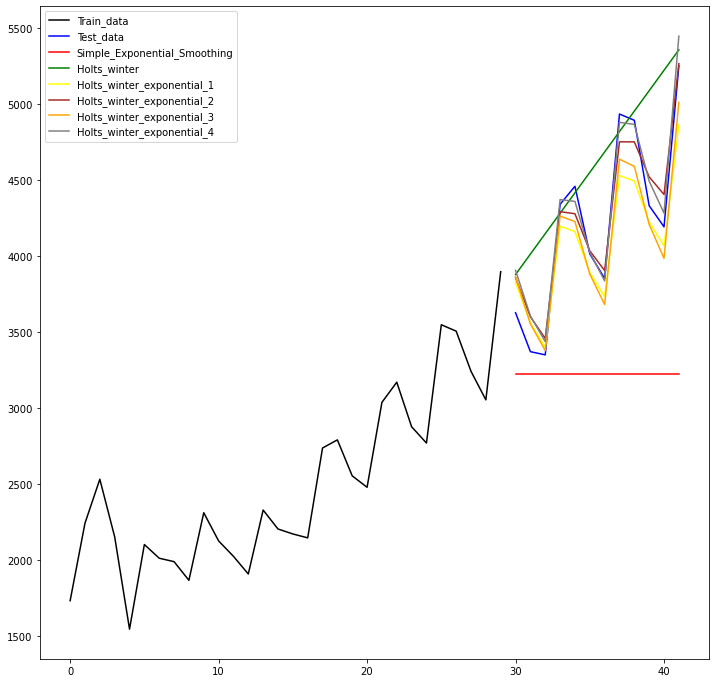

In [69]:
plt.figure(figsize=(12,12))
plt.plot(train_data.index,train_data['Sales'],label='Train_data',color='black')
plt.plot(test_data.index,test_data['Sales'],label='Test_data',color='blue')
plt.plot(predict_ses.index,predict_ses,label='Simple_Exponential_Smoothing',color='red')
plt.plot(pred_hw.index,pred_hw,label='Holts_winter',color='green')
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label ='Holts_winter_exponential_1',color='yellow')
plt.plot(pred_hwe_add_mul.index,pred_hwe_add_mul,label ='Holts_winter_exponential_2',color='brown')
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label ='Holts_winter_exponential_3',color='orange')
plt.plot(pred_hwe_mul_mul.index,pred_hwe_mul_mul,label ='Holts_winter_exponential_4',color='gray')
plt.legend()
plt.show()

## Results of the Data driven models :

In [70]:
#Compare the results
data_driven_model_data ={'MODEL':pd.Series(["SIMPLE_EXPONENTIAL_SMOOTHING_METHOD","HOLT_METHOD",
                          "HOLTS WINTER EXPONENTIAL SMOOTHING WITH ADDITIVE SEASONALITY AND ADDITIVE TREND",
                          "HOLTS WINTER EXPONENTIAL SMOOTHING WITH ADDITIVE SEASONALITY AND MULTIPICATIVE TREND",
                          "HOLTS WINTER EXPONENTIAL SMOOTHING WITH MULTIPICATIVE SEASONALITY AND ADDITIVE TREND",
                          "HOLTS WINTER EXPONENTIAL SMOOTHING WITH MULTIPICATIVE SEASONALITY AND MULTIPICATIVE TREND"]),
      'MAPE_VALUES':pd.Series([round(MAPE(predict_ses,test_data.Sales),4),round(MAPE(pred_hw,test_data.Sales),4),
                              round(MAPE(pred_hwe_add_add,test_data.Sales),4),round(MAPE(pred_hwe_add_mul,test_data.Sales),4),
                              round(MAPE(pred_hwe_mul_add,test_data.Sales),4),round(MAPE(pred_hwe_mul_mul,test_data.Sales),4)])}
table_MAPE = pd.DataFrame(data_driven_model_data)
table_MAPE

,MODEL,MAPE_VALUES
0,SIMPLE_EXPONENTIAL_SMOOTHING_METHOD,22.0468
1,HOLT_METHOD,11.2138
2,HOLTS WINTER EXPONENTIAL SMOOTHING WITH ADDITI...,4.8280
3,HOLTS WINTER EXPONENTIAL SMOOTHING WITH ADDITI...,3.3075
4,HOLTS WINTER EXPONENTIAL SMOOTHING WITH MULTIP...,4.3380
5,HOLTS WINTER EXPONENTIAL SMOOTHING WITH MULTIP...,2.6755


### Forecasting using the best nodel :

#### The best model is the Holts winter Exponential Smoothing With Multipicative Seasonality and Multipicative Trend .

In [71]:
hwe_full_model_mul_mul = ExponentialSmoothing(coco_cola_sales_data_copy["Sales"],seasonal="mul",trend="mul",seasonal_periods=4).fit()
hwe_full_model_mul_mul

In [72]:
#prediction for next 13 quarters 
hwe_full_model_mul_mul.forecast(13)

42    5273.107783
43    4714.587915
44    4570.068871
45    5874.078112
46    5792.432764
47    5178.906753
48    5020.154671
49    6452.589994
50    6362.903758
51    5688.954293
52    5514.567422
53    7088.076943
54    6989.557907
dtype: float64

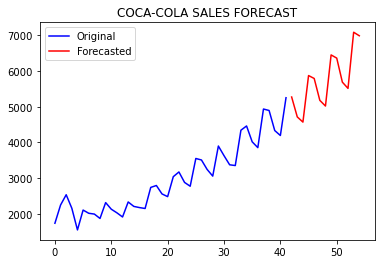

In [73]:
plt.plot(coco_cola_sales_data.index,coco_cola_sales_data['Sales'],label='Original',color='blue')
plt.plot(hwe_full_model_mul_mul.forecast(13),label='Forecasted',color='red')
plt.title('COCA-COLA SALES FORECAST')
plt.legend()
plt.show()

## -----------------------------------------------------------------------------------------------------------------------